In [1]:
from qiskit import *
from qiskit.visualization import plot_histogram
from qiskit.quantum_info import Operator
from qiskit_textbook.tools import array_to_latex
from qiskit.providers.ibmq import least_busy
from qiskit.tools.monitor import job_monitor
import numpy as np

In [2]:
def phase_oracle(n,marked,name = 'Oracle'):
    qc = QuantumCircuit(n,name = name)
    oracle_matrix = np.identity(2**n)
    for i in marked:
        oracle_matrix[i][i] = -1
    qc.unitary(Operator(oracle_matrix),range(n))
    return qc

In [3]:
def diffuser(n):
    qc = QuantumCircuit(n,name = 'Diffuser')
    qc.h(range(n))
    qc.append(phase_oracle(n,[0]),range(n))
    qc.h(range(n))
    return qc

In [4]:
def Grover(n,marked):
    qc = QuantumCircuit(n,n)
    r = int(np.round(np.pi/(4*np.arcsin(np.sqrt(len(marked)/2**n))) -1/2))
    print(f'{n} qubits , basis {marked} states , {r} rounds')
    
    qc.h(range(n))
    for _ in range(r):
        qc.append(phase_oracle(n,marked),range(n))
        qc.append(diffuser(n),range(n))
    
    qc.measure(range(n),range(n))
    return qc
    

5 qubits , basis [0] states , 4 rounds


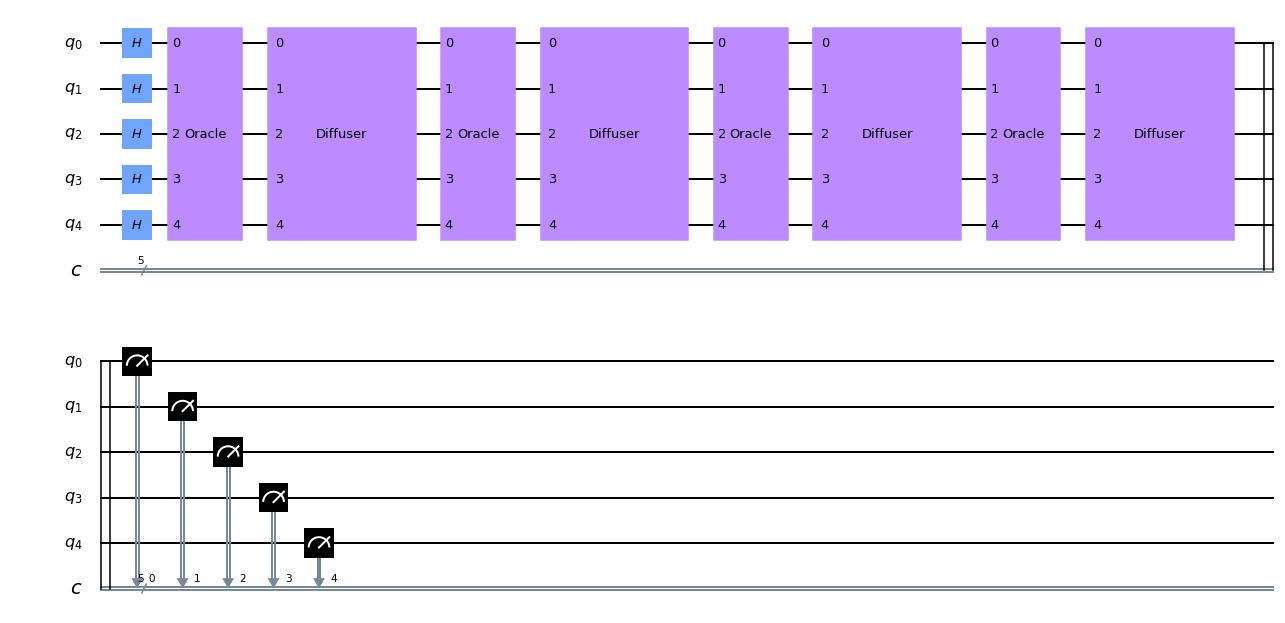

In [5]:
n = 5 
x = np.random.randint(2**n)
marked = [x]
qc = Grover(n,marked)

qc.draw('mpl')

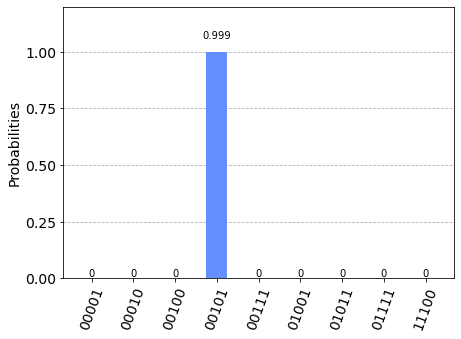

In [29]:
backend = Aer.get_backend('qasm_simulator')
result = execute(qc,backend,shots = 10000).result()
counts = result.get_counts()
plot_histogram(counts)

In [6]:
IBMQ.load_account()
provider = IBMQ.get_provider(hub = 'ibm-q')
from qiskit.providers.ibmq import least_busy
backend = least_busy(provider.backends(filters=lambda b: b.configuration().n_qubits >= 3 and
                                   not b.configuration().simulator and b.status().operational==True))
print(f'backend = {backend}')

backend = ibmqx2


In [7]:
job_exp = execute(qc, backend=backend, shots=1000)
job_monitor(job_exp)

Job Status: job incurred error     


In [ ]:
exp_result = job_exp.result()
counts = exp_result.get_counts()
plot_histogram(counts)